In [1]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import tensorflow as tf
tf.test.gpu_device_name()

Mounted at /content/drive


'/device:GPU:0'

In [2]:
#import packages

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline
import re
import sys
import warnings
import pandas as pd
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import joblib

In [3]:
#needed for DNN 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from keras.regularizers import l2,l1
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from sklearn import preprocessing
from keras import layers
from tensorflow.keras.layers import LSTM,GRU,Bidirectional
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/news category/Participants_Data_News_category/train_df.csv', encoding='utf-8')
df.head()


,STORY,SECTION,cleaned_text
0,But the most painful was the huge reversal in ...,3,painful huge reversal fee income unheard among...
1,How formidable is the opposition alliance amon...,0,formidable opposition alliance among congress ...
2,Most Asian currencies were trading lower today...,3,asian currency trade low today south korean 04...
3,"If you want to answer any question, click on ‘...",1,want answer question click answer click answer...
4,"In global markets, gold prices edged up today ...",3,global market gold price edge today disappoint...


In [5]:
df.SECTION.value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

In [6]:
#split the data in train, validation, test

def dataset_split(headlines,category):

    X,X_test,y,y_test = train_test_split(headlines,category,train_size = 0.99,
                                                  test_size = 0.01,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.99,
                                                  test_size = 0.01,random_state =0)
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(headlines),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))
  
    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [7]:
df.clean_text=df.cleaned_text.astype(str)

X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(df.cleaned_text,df.SECTION)


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 7628 
	Training		 7475 
	Test			 77 
	Validation		 76


In [77]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/news category/Participants_Data_News_category/test_df.csv')
test_df.head()

,STORY,cleaned_text
0,2019 will see gadgets like gaming smartphones ...,2019 see gadget like game smartphones wearable...
1,It has also unleashed a wave of changes in the...,also unleashed wave change mcu make sure futur...
2,It can be confusing to pick the right smartpho...,confuse pick right smartphone segregate top sm...
3,The mobile application is integrated with a da...,mobile application integrate dashboard confirm...
4,We have rounded up some of the gadgets that sh...,round gadget show 2018 leave indelible mark co...


In [78]:
#define perameters for GRU and padding and tokenization
vocab_size =50000
embedding_dim = 128
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [79]:
test_df.cleaned_text=test_df.cleaned_text.astype(str)
test = test_df['cleaned_text']
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(test.values)
word_index = tokenizer.word_index
og_test_sequences = tokenizer.texts_to_sequences(test.values)
og_test_padded = pad_sequences(og_test_sequences,padding=padding_type, maxlen=max_length)

In [9]:
# Train Data Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train.values)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train.values)
train_padded = pad_sequences(train_sequences,padding=padding_type, maxlen=max_length)

In [10]:
#Tokenizer Info
(word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
#insightful info about tokens
def tokenizer_info(mylist,bool):
  ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
  for w,c in ordered[:10]:
    print(w,"\t",c)

#Print all the information
print("Words --> Counts:")
tokenizer_info(word_counts,bool =True )
print("\nWords --> Documents:")
tokenizer_info(word_docs,bool =True )
print("\nWords --> Index:")
tokenizer_info(word_index,bool =True )    
print("\nTotal Documents -->",document_count)
print(f"Found {len(word_index)} unique tokens")

Words --> Counts:
say 	 4604
also 	 2539
year 	 2172
party 	 1992
india 	 1854
election 	 1742
new 	 1739
make 	 1664
congress 	 1633
bjp 	 1535

Words --> Documents:
say 	 2761
also 	 2005
year 	 1575
make 	 1339
new 	 1268
india 	 1216
one 	 1163
come 	 1148
time 	 1106
like 	 1061

Words --> Index:
soontobelaunched 	 34521
imperfection 	 34520
skullcandy 	 34519
wilkins 	 34518
bower 	 34517
premiumluxury 	 34516
reacted 	 34515
7556 	 34514
7474 	 34513
7425 	 34512

Total Documents --> 7475
Found 34521 unique tokens


In [11]:
def padded_headlines(original,encoded,padded):
  print("\n\t\t\t Encoded Sequences ","\n")  
  print(original,"\n",encoded) 
  print("\n\t\t\t Paded Sequences \n",original,"\n",padded)

padded_headlines(X_train[2],train_sequences[2],train_padded[2])


			 Encoded Sequences  

asian currency trade low today south korean 04 china renminbi 023 china offshore 015 malaysian ringgit 012 indonesian rupiah 011 taiwan dollar 006 however japanese yen 032 dollar index measure u currencys strength major currency trade 9726 014 previous close 97395 
 [17, 166, 277, 290, 876, 557, 368, 7774, 18363, 12883, 284, 876, 89, 5400, 5068, 73, 776, 12884, 179, 876, 973, 5797, 1868, 297, 1030, 256, 3, 21, 844, 290, 876, 295, 10444, 3, 83, 1168, 3419, 312, 18364, 8, 8846, 5798, 187, 10445, 429, 1123, 290, 876, 178, 22, 193, 12885, 187, 20, 1347, 312, 10445, 429, 85, 297, 1030, 152, 12886, 174, 1770, 258, 41, 98, 258, 1612, 174, 272, 1043, 76, 12, 139, 1700, 202, 742, 159, 6313, 2770, 845, 10446, 630, 10447, 107, 100, 576, 18365, 2771, 134, 18366, 576, 152, 1770, 258, 10446, 3, 10448, 1770, 269, 184, 2770, 303, 22, 41, 576, 287, 41, 155, 598, 224, 1276, 3552, 809, 717, 5799, 8847, 2770, 258, 10449, 2029, 107, 2770, 22, 34, 1869, 56, 598, 449, 846, 56, 598, 

In [12]:
# Validation Data Tokenization
validation_sequences = tokenizer.texts_to_sequences(X_valid.values)
validation_padded = pad_sequences(validation_sequences,padding=padding_type, maxlen=max_length)
#padded_headlines(X_valid[38000],validation_sequences[38000],validation_padded[38000])


In [13]:
# Test Data Tokenization
test_sequences = tokenizer.texts_to_sequences(X_test.values)
test_padded = pad_sequences(test_sequences,padding=padding_type, maxlen=max_length)
#padded_headlines(X_test[35000],test_sequences[35000],test_padded[5000])


In [14]:
train_label_seq = y_train
valid_label_seq = y_valid
testing_label_seq = y_test

In [28]:
accuracy_threshold = 0.999
vocab_size = 50000
embedding_dim=128
max_length = 120
num_category = 4
opt=RMSprop(0.001)
path="/content/drive/MyDrive/Colab Notebooks/news category/models"

In [29]:
keras.backend.clear_session()
#callback function for early stopping
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()

**Bidirectional GRU**

In [30]:

filepath = path+"BidGruModel.h5"

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss',  
                                    factor=0.1, patience=2, 
                                    verbose=1, mode='auto', 
                                    min_delta=0.0001, cooldown=1, min_lr=0.000001)
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='auto')
callback_list = [acc_callback, checkpoint,reduceLROnPlat]
# checkpoint = ModelCheckpoint(s , monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = RMSprop(lr=1e-2, epsilon=1e-08)


BGRU_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]),
    tf.keras.layers.Bidirectional(GRU(128,return_sequences=True,dropout=0.2)),
    #tf.keras.layers.Bidirectional(GRU(64, dropout = 0.2, recurrent_dropout = 0.2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])


In [31]:
BGRU_model.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
BGRU_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          6400000   
                                                                 
 bidirectional (Bidirectiona  (None, 120, 256)         198144    
 l)                                                              
                                                                 
 dense (Dense)               (None, 120, 64)           16448     
                                                                 
 dropout (Dropout)           (None, 120, 64)           0         
                                                                 
 dense_1 (Dense)             (None, 120, 64)           4160      
                                                                 
 dropout_1 (Dropout)         (None, 120, 64)           0         
                                                        

In [32]:
num_epochs = 20
batch = 128

BGRU_model_history = BGRU_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)

Epoch 1/20
59/59 [==============================] - ETA: 0s - loss: 1.6429 - accuracy: 0.6470
Epoch 00001: val_accuracy improved from -inf to 0.75000, saving model to /content/drive/MyDrive/Colab Notebooks/news category/modelsBidGruModel.h5
59/59 [==============================] - 5s 40ms/step - loss: 1.6429 - accuracy: 0.6470 - val_loss: 0.6910 - val_accuracy: 0.7500 - lr: 0.0100
Epoch 2/20
57/59 [===========================>..] - ETA: 0s - loss: 0.4361 - accuracy: 0.9150
Epoch 00002: val_accuracy improved from 0.75000 to 0.93421, saving model to /content/drive/MyDrive/Colab Notebooks/news category/modelsBidGruModel.h5
59/59 [==============================] - 2s 26ms/step - loss: 0.4268 - accuracy: 0.9167 - val_loss: 0.2551 - val_accuracy: 0.9342 - lr: 0.0100
Epoch 3/20
58/59 [============================>.] - ETA: 0s - loss: 0.6030 - accuracy: 0.9122
Epoch 00003: val_accuracy improved from 0.93421 to 0.97368, saving model to /content/drive/MyDrive/Colab Notebooks/news category/models

In [33]:
# Plot training results
def model_evaluate(history,directory,filename):
  H = history.history
  fig = plt.figure(figsize = (20, 7))
  plt.subplot(121)
  plt.xlabel("number of epoch")
  plt.ylabel("Validation accuracy")
  plt.plot(H['accuracy'], label = 'acc')
  plt.plot(H['val_accuracy'], label = 'val_acc')
  plt.grid()
  plt.legend()
  plt.subplot(122)
  plt.xlabel("number of epoch")
  plt.ylabel("Validation loss")
  plt.plot(H['loss'], label = 'loss')
  plt.plot(H['val_loss'], label = 'val_loss')
  plt.grid()
  plt.legend()


In [72]:
# Plot all model results
def model_all_evaluate(history1,history2,history3,directory,filename):
  H1 = history1.history
  H2 = history2.history
  H3 = history3.history
  fig = plt.figure(figsize = (20, 7))
  plt.subplot(121)
  plt.xlabel("number of epoch")
  plt.ylabel("Validation accuracy")
  plt.plot(H1['val_accuracy'], label = 'Bidirectional GRU')
  plt.plot(H2['val_accuracy'], label = 'Bidirectional LSTM')
  plt.plot(H3['val_accuracy'], label = 'C_LSTM')
  # plt.plot(H5['val_accuracy'], label = 'C-LSTM')

  
  plt.grid()
  plt.legend()
  plt.subplot(122)
  plt.xlabel("number of epoch")
  plt.ylabel("Validation loss")
  plt.plot(H1['val_loss'], label = 'Bidirectional GRU')
  plt.plot(H2['val_loss'], label = 'Bidirectional LSTM')
  plt.plot(H3['val_loss'], label = 'C_LSTM')
  plt.grid()
  plt.legend()

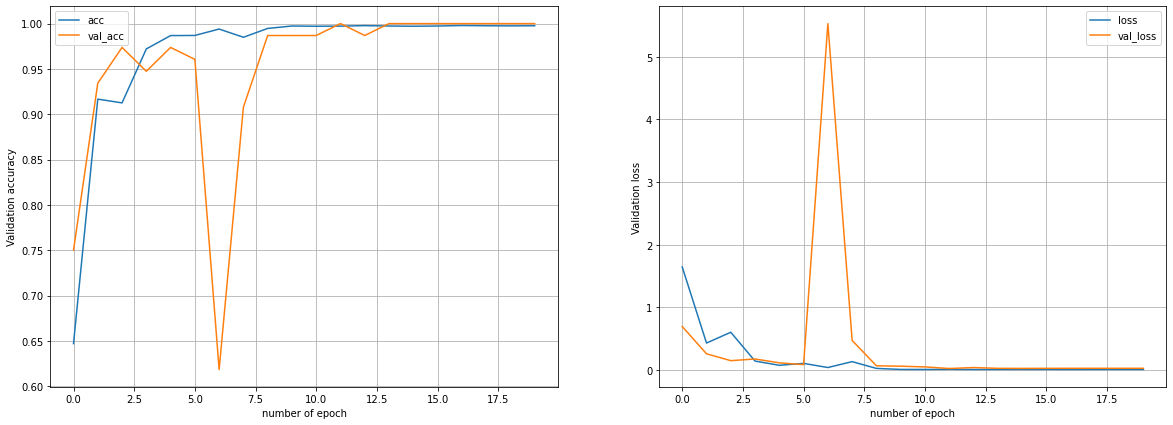

In [35]:


model_evaluate(BGRU_model_history,"BiGru","Bi_Gru_evaluation")

In [36]:
#confusion matrix
  
def conf_matrix(y_pred,classfier,directory,filename):

  cm = confusion_matrix(y_test, y_pred) 
# Transform to df for easier plotting
  
  cm_df = pd.DataFrame(cm,
                        index = ['Politics', 'Technology', 'Entertainment', 'Business'], 
                        columns = ['Politics', 'Technology', 'Entertainment', 'Business'])
  plt.figure(figsize=(8,6))
  sn.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
  plt.title('\n'+classfier+'Accuracy: {0:.2f}'.format(accuracy_score(testing_label_seq, y_pred)*100))
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.xticks(rotation = 45)
  plt.yticks(rotation = 45)
  plt.show()
  plt.close()

In [37]:
#Report generation
  
def report_generate(pred,classfier,directory,filename):
  report = pd.DataFrame(classification_report(y_true = testing_label_seq, y_pred = pred, output_dict=True)).transpose()
  report = report.rename(index={'0': 'Politics','1':'Technology','2':'Entertainment','3':'Business'})
  report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
  report=report.drop(["support"],axis=1)
  columns = ['precision','recall','f1-score']
  report.columns = columns
  plt = report.plot(kind='bar',figsize=(12,6))
  
  plot=plt.tick_params(rotation=40)
  return plot,report

In [38]:
#make predictions

model = load_model(path+"BidGruModel.h5")
predictions = model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)


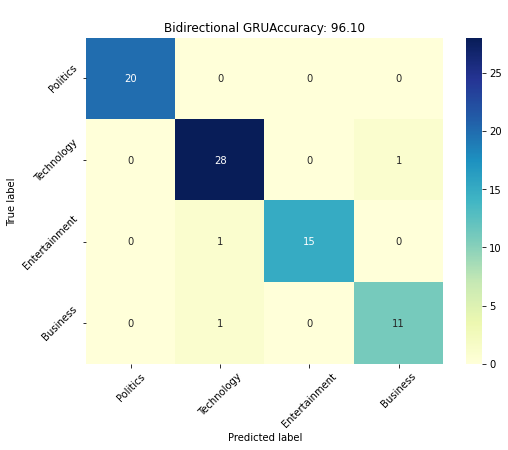

In [39]:
conf_matrix(y_pred,"Bidirectional GRU","BiGru","Bi_Gru_confusion_matrix")

,precision,recall,f1-score
Politics,100.00,100.00,100.00
Technology,93.33,96.55,94.92
Entertainment,100.00,93.75,96.77
Business,91.67,91.67,91.67
accuracy,96.10,96.10,96.10
macro avg,96.25,95.49,95.84
weighted avg,96.19,96.10,96.12


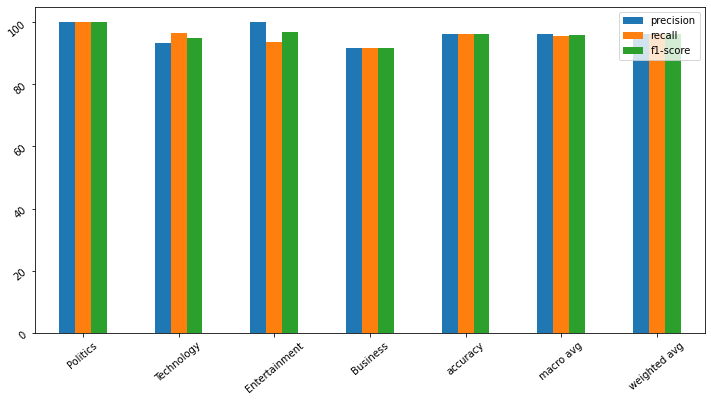

In [40]:
GRUreport=report_generate(y_pred,"Bidirectional GRU","Bidirectional GRU","Bidirectional GRU")
GRUreport[1]

**Bidirectional LSTM**

In [41]:
embedding_dim=128
filepath = path+"RNN.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 

RNN_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]),
    tf.keras.layers.Bidirectional(LSTM(128,dropout = 0.2, recurrent_dropout = 0.2,return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(100, dropout = 0.2, recurrent_dropout = 0.2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])


In [42]:
RNN_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(RNN_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 128)          6400000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 120, 256)         263168    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              285600    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                12864     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 4)                

In [43]:
num_epochs = 20
batch = 128

RNN_history = RNN_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)



Epoch 1/20
59/59 [==============================] - ETA: 0s - loss: 0.6655 - accuracy: 0.7378
Epoch 00001: val_accuracy improved from -inf to 0.90789, saving model to /content/drive/MyDrive/Colab Notebooks/news category/modelsRNN.h5
59/59 [==============================] - 130s 2s/step - loss: 0.6655 - accuracy: 0.7378 - val_loss: 0.4124 - val_accuracy: 0.9079
Epoch 2/20
59/59 [==============================] - ETA: 0s - loss: 0.1352 - accuracy: 0.9623
Epoch 00002: val_accuracy improved from 0.90789 to 0.94737, saving model to /content/drive/MyDrive/Colab Notebooks/news category/modelsRNN.h5
59/59 [==============================] - 115s 2s/step - loss: 0.1352 - accuracy: 0.9623 - val_loss: 0.1720 - val_accuracy: 0.9474
Epoch 3/20
59/59 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9813
Epoch 00003: val_accuracy did not improve from 0.94737
59/59 [==============================] - 115s 2s/step - loss: 0.0677 - accuracy: 0.9813 - val_loss: 0.1676 - val_accuracy:

In [44]:
#make predictions

RNN_model = load_model(path+"RNN.h5")
RNN_predictions = RNN_model.predict(test_padded)
y_pred = np.argmax(RNN_predictions, axis=1)

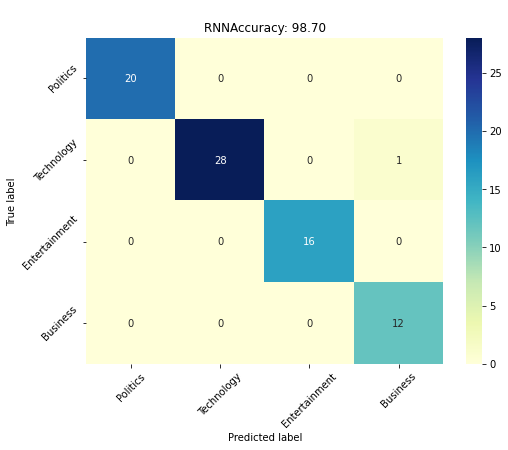

In [45]:
conf_matrix(y_pred,"RNN","RNN","RNN_confusion_matrix")

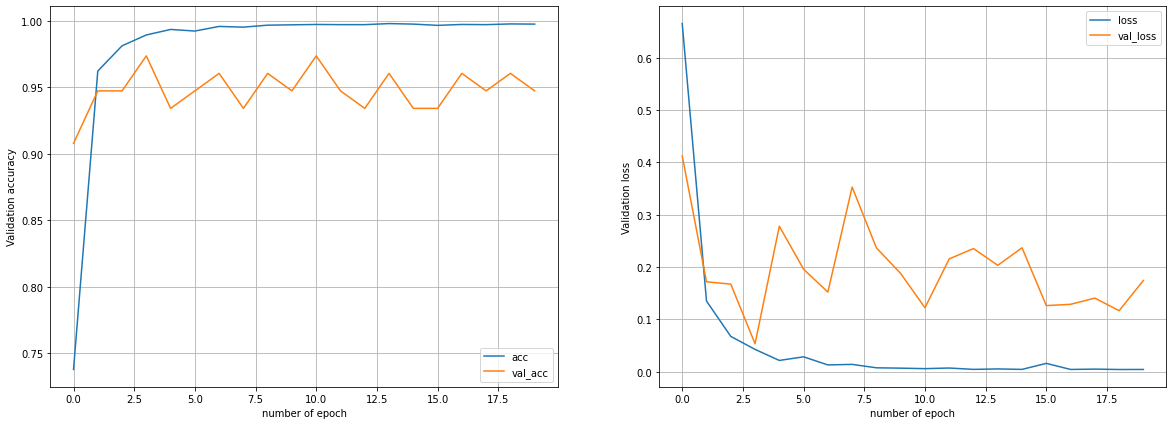

In [46]:
# Plot training results
model_evaluate(RNN_history,"RNN","RNN_evaluation")


,precision,recall,f1-score
Politics,100.00,100.00,100.00
Technology,100.00,96.55,98.25
Entertainment,100.00,100.00,100.00
Business,92.31,100.00,96.00
accuracy,98.70,98.70,98.70
macro avg,98.08,99.14,98.56
weighted avg,98.80,98.70,98.72


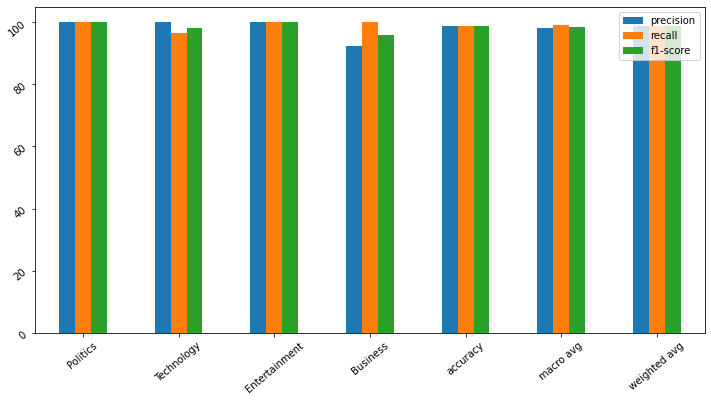

In [48]:
RNNreport=report_generate(y_pred,"Bidirectional LSTM",'directory','filename')
RNNreport[1]

**C-LSTM**

In [53]:
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

filepath = path+"C-LSTM.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 
embedding_dim=128
# create the model
C_LSTM_model = Sequential()
C_LSTM_model.add(Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]))
C_LSTM_model.add(SpatialDropout1D(0.7))
C_LSTM_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
C_LSTM_model.add(MaxPooling1D(pool_size=2))
C_LSTM_model.add(LSTM(200, dropout=0.5, recurrent_dropout=0.5))
C_LSTM_model.add(Dense(4, activation='softmax'))



In [54]:
C_LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(C_LSTM_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 128)          6400000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 120, 128)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_1 (Conv1D)           (None, 120, 32)           12320     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 60, 32)           0         
 1D)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 200)               186400    
                                                                 
 dense_8 (Dense)             (None, 4)                

In [55]:
num_epochs = 30
batch = 128

C_LSTM_history = C_LSTM_model.fit(train_padded, train_label_seq,
                           epochs=num_epochs,
                           batch_size = batch,
                           validation_data=(validation_padded,valid_label_seq),
                           verbose=1,
                           callbacks = callback_list)


Epoch 1/30
59/59 [==============================] - ETA: 0s - loss: 1.2503 - accuracy: 0.4215
Epoch 00001: val_accuracy improved from -inf to 0.63158, saving model to /content/drive/MyDrive/Colab Notebooks/news category/modelsC-LSTM.h5
59/59 [==============================] - 25s 268ms/step - loss: 1.2503 - accuracy: 0.4215 - val_loss: 0.9165 - val_accuracy: 0.6316
Epoch 2/30
59/59 [==============================] - ETA: 0s - loss: 0.9742 - accuracy: 0.5989
Epoch 00002: val_accuracy improved from 0.63158 to 0.76316, saving model to /content/drive/MyDrive/Colab Notebooks/news category/modelsC-LSTM.h5
59/59 [==============================] - 16s 264ms/step - loss: 0.9742 - accuracy: 0.5989 - val_loss: 0.6536 - val_accuracy: 0.7632
Epoch 3/30
59/59 [==============================] - ETA: 0s - loss: 0.7905 - accuracy: 0.6974
Epoch 00003: val_accuracy improved from 0.76316 to 0.78947, saving model to /content/drive/MyDrive/Colab Notebooks/news category/modelsC-LSTM.h5
59/59 [===============

In [56]:
#make predictions

C_LSTM_model = load_model(path+"C-LSTM.h5")
predictions = C_LSTM_model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

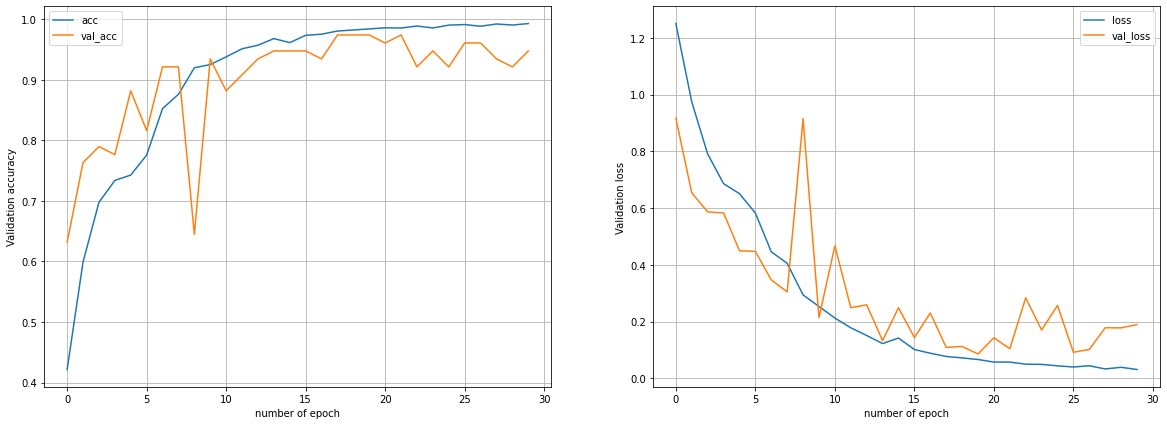

In [57]:
# Plot training results
model_evaluate(C_LSTM_history,"C_LSTM","C_LSTM_evaluation")


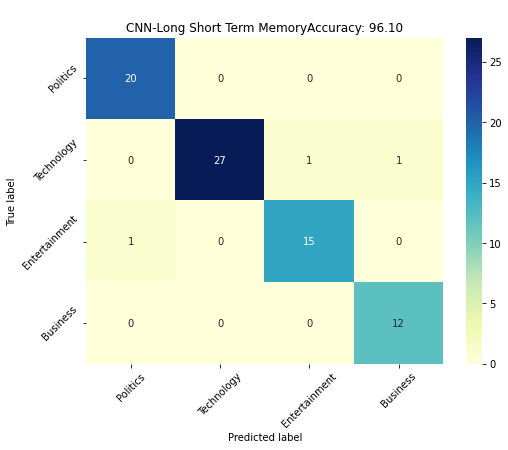

In [58]:
conf_matrix(y_pred,"CNN-Long Short Term Memory","C_LSTM","C_LSTM_confusion_matrix")

,precision,recall,f1-score
Politics,95.24,100.00,97.56
Technology,100.00,93.10,96.43
Entertainment,93.75,93.75,93.75
Business,92.31,100.00,96.00
accuracy,96.10,96.10,96.10
macro avg,95.32,96.71,95.93
weighted avg,96.27,96.10,96.10


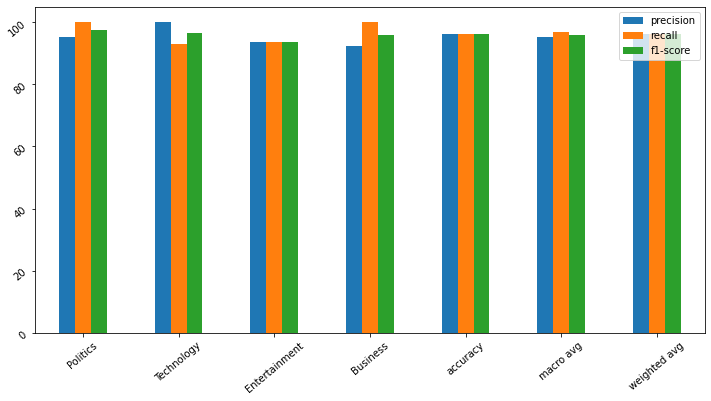

In [59]:
C_LSTMreport=report_generate(y_pred,"CNN-Long Short Term Memory","C_LSTM","C_LSTM_report")
C_LSTMreport[1]

**Result analysis**

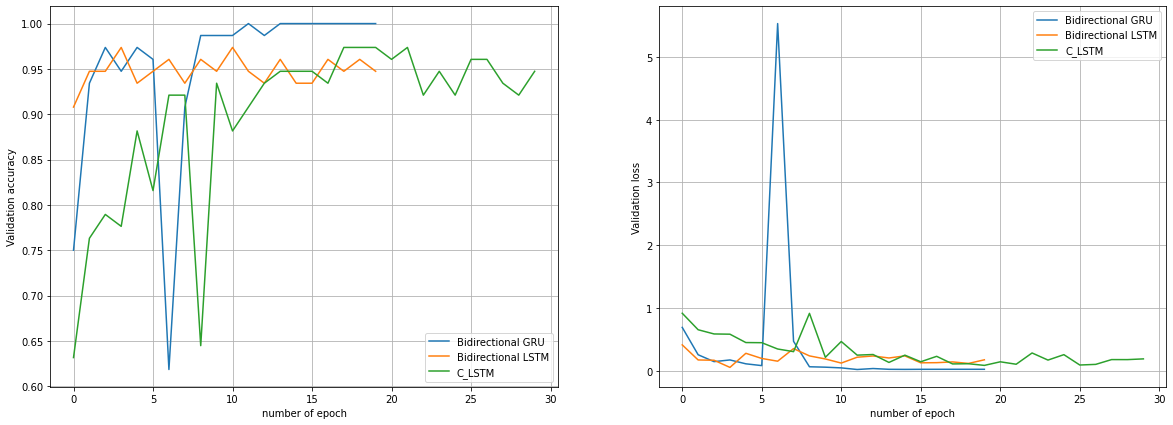

In [73]:
model_all_evaluate(BGRU_model_history,RNN_history,C_LSTM_history,"DL comparison","val_eva")

In [61]:

MLA = {
     'Bidirectional GRU' : model,
     'Bidirectional LSTM' : RNN_model,
     'C_LSTM' : C_LSTM_model, 
}

In [62]:
# Functions to compute True Positives, True Negatives, False Positives and False Negatives

def true_positive(y_true, y_pred):   
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1

In [63]:
#Computation of macro-averaged precision

def macro_precision(y_true, y_pred):
    # find the number of classes
    num_classes = len(np.unique(y_true))
    # initialize precision to 0
    precision = 0
    categories = 4
    # loop over all classes
    for class_ in range (categories):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # compute true positive for current class
        tp = true_positive(temp_true, temp_pred)
        # compute false positive for current class
        fp = false_positive(temp_true, temp_pred)
        # compute precision for current class
        temp_precision = tp / (tp + fp + 1e-6)
        # keep adding precision for all classes
        precision += temp_precision
        
    # calculate and return average precision over all classes
    precision /= num_classes
    return precision

In [64]:
def recall(y_true, y_pred, n_labels):
    total_f1 = 0.
    for i in range(n_labels):
        yt = y_true == i
        yp = y_pred == i

        tp = np.sum(yt & yp)

        tpfp = np.sum(yp)
        tpfn = np.sum(yt)
        if tpfp == 0:
            print('[WARNING] F-score is ill-defined and being set to 0.0 in labels with no predicted samples.')
            precision = 0.
        else:
            precision = tp / tpfp
        if tpfn == 0:
            print(f'[ERROR] label not found in y_true...')
            recall = 0.
        else:
            recall = tp / tpfn

        if precision == 0. or recall == 0.:
            f1 = 0.
        else:
            f1 = 2 * precision * recall / (precision + recall)
        total_f1 += f1
    return recall

In [65]:
def macro_f1_score(y_true, y_pred, n_labels):
    total_f1 = 0.
    for i in range(n_labels):
        yt = y_true == i
        yp = y_pred == i

        tp = np.sum(yt & yp)

        tpfp = np.sum(yp)
        tpfn = np.sum(yt)
        if tpfp == 0:
            print('[WARNING] F-score is ill-defined and being set to 0.0 in labels with no predicted samples.')
            precision = 0.
        else:
            precision = tp / tpfp
        if tpfn == 0:
            print(f'[ERROR] label not found in y_true...')
            recall = 0.
        else:
            recall = tp / tpfn

        if precision == 0. or recall == 0.:
            f1 = 0.
        else:
            f1 = 2 * precision * recall / (precision + recall)
        total_f1 += f1
    return total_f1 / n_labels

In [66]:
columns = []
compare = pd.DataFrame(columns = columns)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=4
row_index = 0
for name,alg in MLA.items():
    #fp, tp, th = roc_curve(y_test, predicted ,pos_label=['Political', 'acceptable', 'religious', 'sexual'])
    MLA_name = name
    #alg.fit(X_train, y_train)
    predicted = alg.predict(test_padded)
    y_pred = np.argmax(predicted, axis=1)
    compare.loc[row_index,'Name'] = MLA_name
    compare.loc[row_index, 'Test Accuracy'] = accuracy_score(testing_label_seq,y_pred)
    compare.loc[row_index, 'Precision'] = macro_precision(testing_label_seq, y_pred)
    compare.loc[row_index, 'Recall'] = recall(testing_label_seq,y_pred,4)
    compare.loc[row_index, 'F1 Score'] = macro_f1_score(testing_label_seq,y_pred,4)
    row_index+=1
    
compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
compare

,Name,Test Accuracy,Precision,Recall,F1 Score
1,Bidirectional LSTM,0.987013,0.980769,1.000000,0.985614
0,Bidirectional GRU,0.961039,0.962500,0.916667,0.958390
2,C_LSTM,0.961039,0.953239,1.000000,0.959349


**Since Bidirectional LSTM performed the best. We will use the classifier for the predictions on testing data**

In [87]:
RNN_predict = RNN_model.predict(og_test_padded)
RNN_pred = np.argmax(RNN_predict, axis=1)

In [88]:
RNN_pred

array([1, 1, 1, ..., 1, 0, 1])

In [89]:
submission = pd.DataFrame({'SECTION':RNN_pred})
submission.to_excel(path + 'submission_v3.xlsx', index=False)